In [20]:
import pandas as pd
import numpy as np
from utils import *
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import trange
from CharRNN import CharRNN
import tensorflow as tf
matplotlib.rc('figure', figsize=(10, 5))

%matplotlib inline

In [21]:
df = pd.read_csv('chembl.csv')

/data/home/viktor_petukhov/local/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df = df[~pd.isnull(df.acd_logd) & ~pd.isnull(df.acd_logp)]

In [23]:
df['affinity'] = np.zeros(df.shape[0])

In [24]:
smiles = df.canonical_smiles.apply(norm)

In [6]:
rnn_cell_size = 64
num_layers = 2
embedding_size = 32

split_size = 30
batchsize = 100
epochs = 20
stride=1

num_features = 3

In [7]:
sess = tf.Session()

In [8]:
model = CharRNN(sess, len(elems)+num_features, len(elems), embedding_size, 
                rnn_cell_size, num_layers, len(elems)-1, )

In [25]:
features = df[["acd_logd", "acd_logp", "affinity"]].values

In [26]:
averages = []

In [37]:
model.save('final.chkpt')

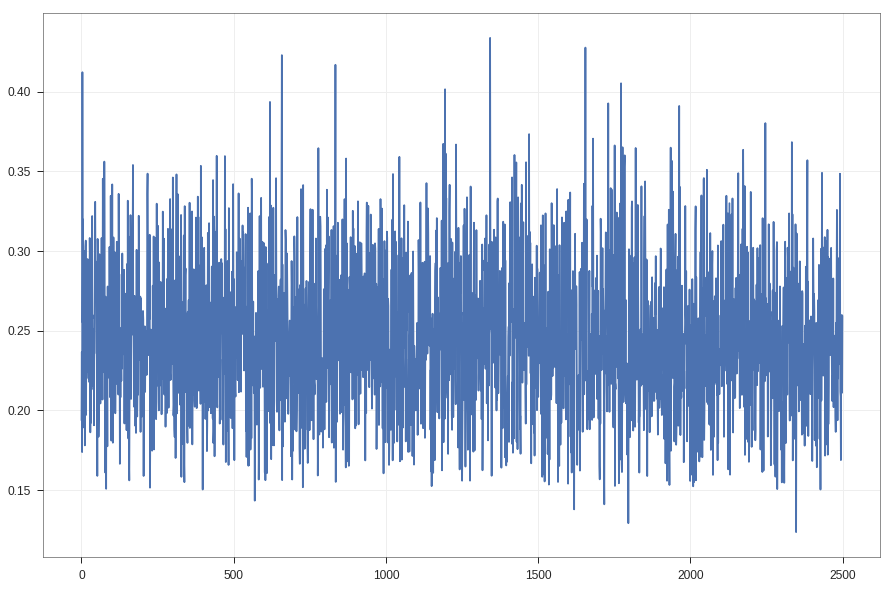

Epoch losses:  [0.24912783961245655, 0.2484595429890534, 0.24850697930311816, 0.24791904019725633, 0.24758965630625845, 0.24678925645065125, 0.24617895053869607, 0.24542378634788217, 0.24687842325051926, 0.24433501922114567, 0.24431068716052187, 0.24425202996985859]
Sample:  CN([C@@H]1CC[C@@H](OCc2ccccc2)S(=O)(=O)c3ccccc3O)[C@H]1O
Sample:  Cl.OCCOCCNc1nc2SCC(=O)Nc2cc1Cl


In [ ]:
for epoch in range(epochs):
    losses = []
    
    print("Epoch number: ", epoch)
    
    for X_batch, Y_batch, lengths in tqdm_notebook(iterate_minibatches(smiles.values, features, batchsize, True), 
                                             total=len(smiles)//batchsize):
        
        loss = model.train_step(X_batch, Y_batch, lengths)
        losses.append(loss)
        
        if len(losses) % 50 == 0:
            clear_output(True)
            plt.figure(figsize=[15, 10])
            plt.plot(losses)
            plt.show()
            print("Epoch losses: ", averages)

        if len(losses) % 10 == 0:
            
            feat = features[np.random.choice(np.arange(features.shape[0]))]

            print("Sample: ", generate_new(model, feat))

            model.save('tmp/{}_{}.chkpt'.format(epoch, len(losses)))
    
    averages.append(np.mean(losses))